## Machine Learning Assignment 2
#### Section 1 Ji Hyun Kim

##### Cancer.csv

**Dataset Description**:
The Breast Cancer Dataset contains features computed from a digitized image of a fine needle aspirate of a breast mass. The goal is to classify whether cancer is malignant or benign.

**Note**: Please use `df = df.loc[:, ~df.columns.str.contains('^Unnamed')]` to remove any Unnamed columns from dataset.

In [109]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.datasets import load_digits
from sklearn import datasets

In [110]:
# Import the dataset
cancer_df = pd.read_csv("Cancer.csv")

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There's one unnamed empty column at the end of the dataset.

In [111]:
# Remove any unnamed columns
cancer_df = cancer_df.loc[:, ~cancer_df.columns.str.contains('^Unnamed')]

# Remove id
cancer_df = cancer_df.iloc[:,1:]

# Check again
cancer_df.info() # Unnamed column is dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### 1. **Data Exploration and Visualization** (15 pts):
- Explore the Breast Cancer Dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

In [112]:
#Bar plot to check the distribution of diagnosis(M, B)
cancer_df.diagnosis.replace({"M":1, "B":0}, inplace=True)
cancer_df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Diagnosis Count')

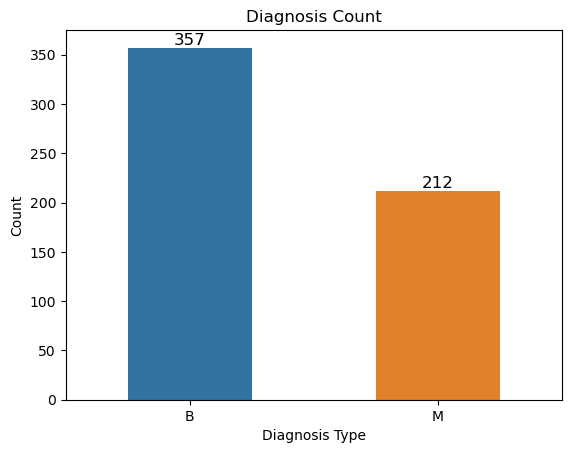

In [113]:
# Plot a bar plot using the seaborn package
ax = sns.countplot(x='diagnosis', data=cancer_df, width=0.5)
# Add values on top of each bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
# Add labels and title
ax.set_xticklabels(['B', 'M'])
ax.set_xlabel('Diagnosis Type')  
ax.set_ylabel('Count')          
ax.set_title('Diagnosis Count')

In this dataset, there are 357 cases of benign diagnosis and 212 cases of malignant diagnosis so benign cases are more frequent than malignant ones.  

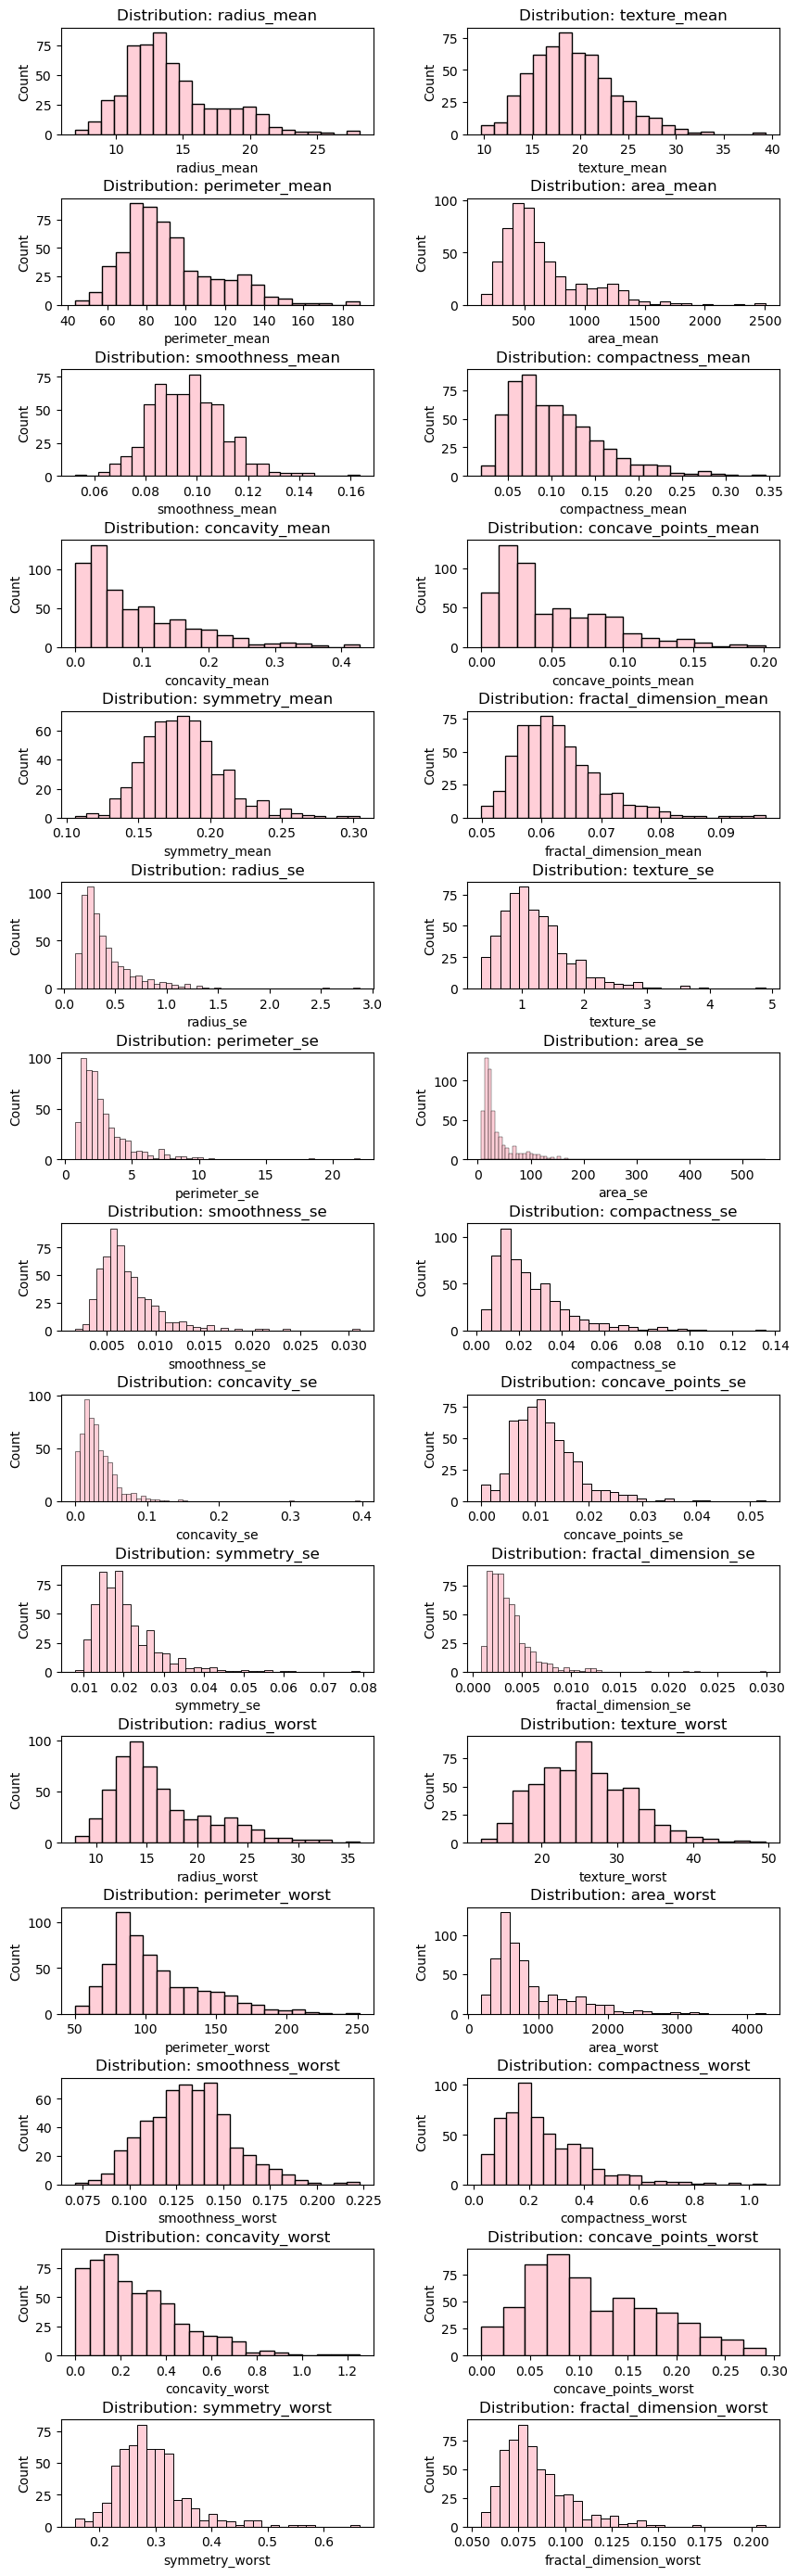

In [114]:
# Plot histograms for each features, from radius_mean to fractal_dimension_worst (30 histograms)
fig, ax = plt.subplots(nrows = 15,ncols = 2,figsize = (10,35)) # Create frame to add 30 subplots
plt.subplots_adjust(wspace=0.3, hspace=0.6)
# Define features as a list
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Using for loop add histograms into the frame
for i in range(len(features)):
    plt.subplot(15, 2, i + 1)
    sns.histplot(cancer_df[features[i]], color='pink', edgecolor='black')
    title = 'Distribution: ' + features[i]
    plt.title(title)

plt.show()

Most of the numeric features are right skewed, but some of features including "texture_mean", "smoothness_mean","symmetry_mean", "fractal_dimension_mean", "texture_worst", "smoothness_worst", and "symmetry_worst" are not perfectly but roughly normally distributed.

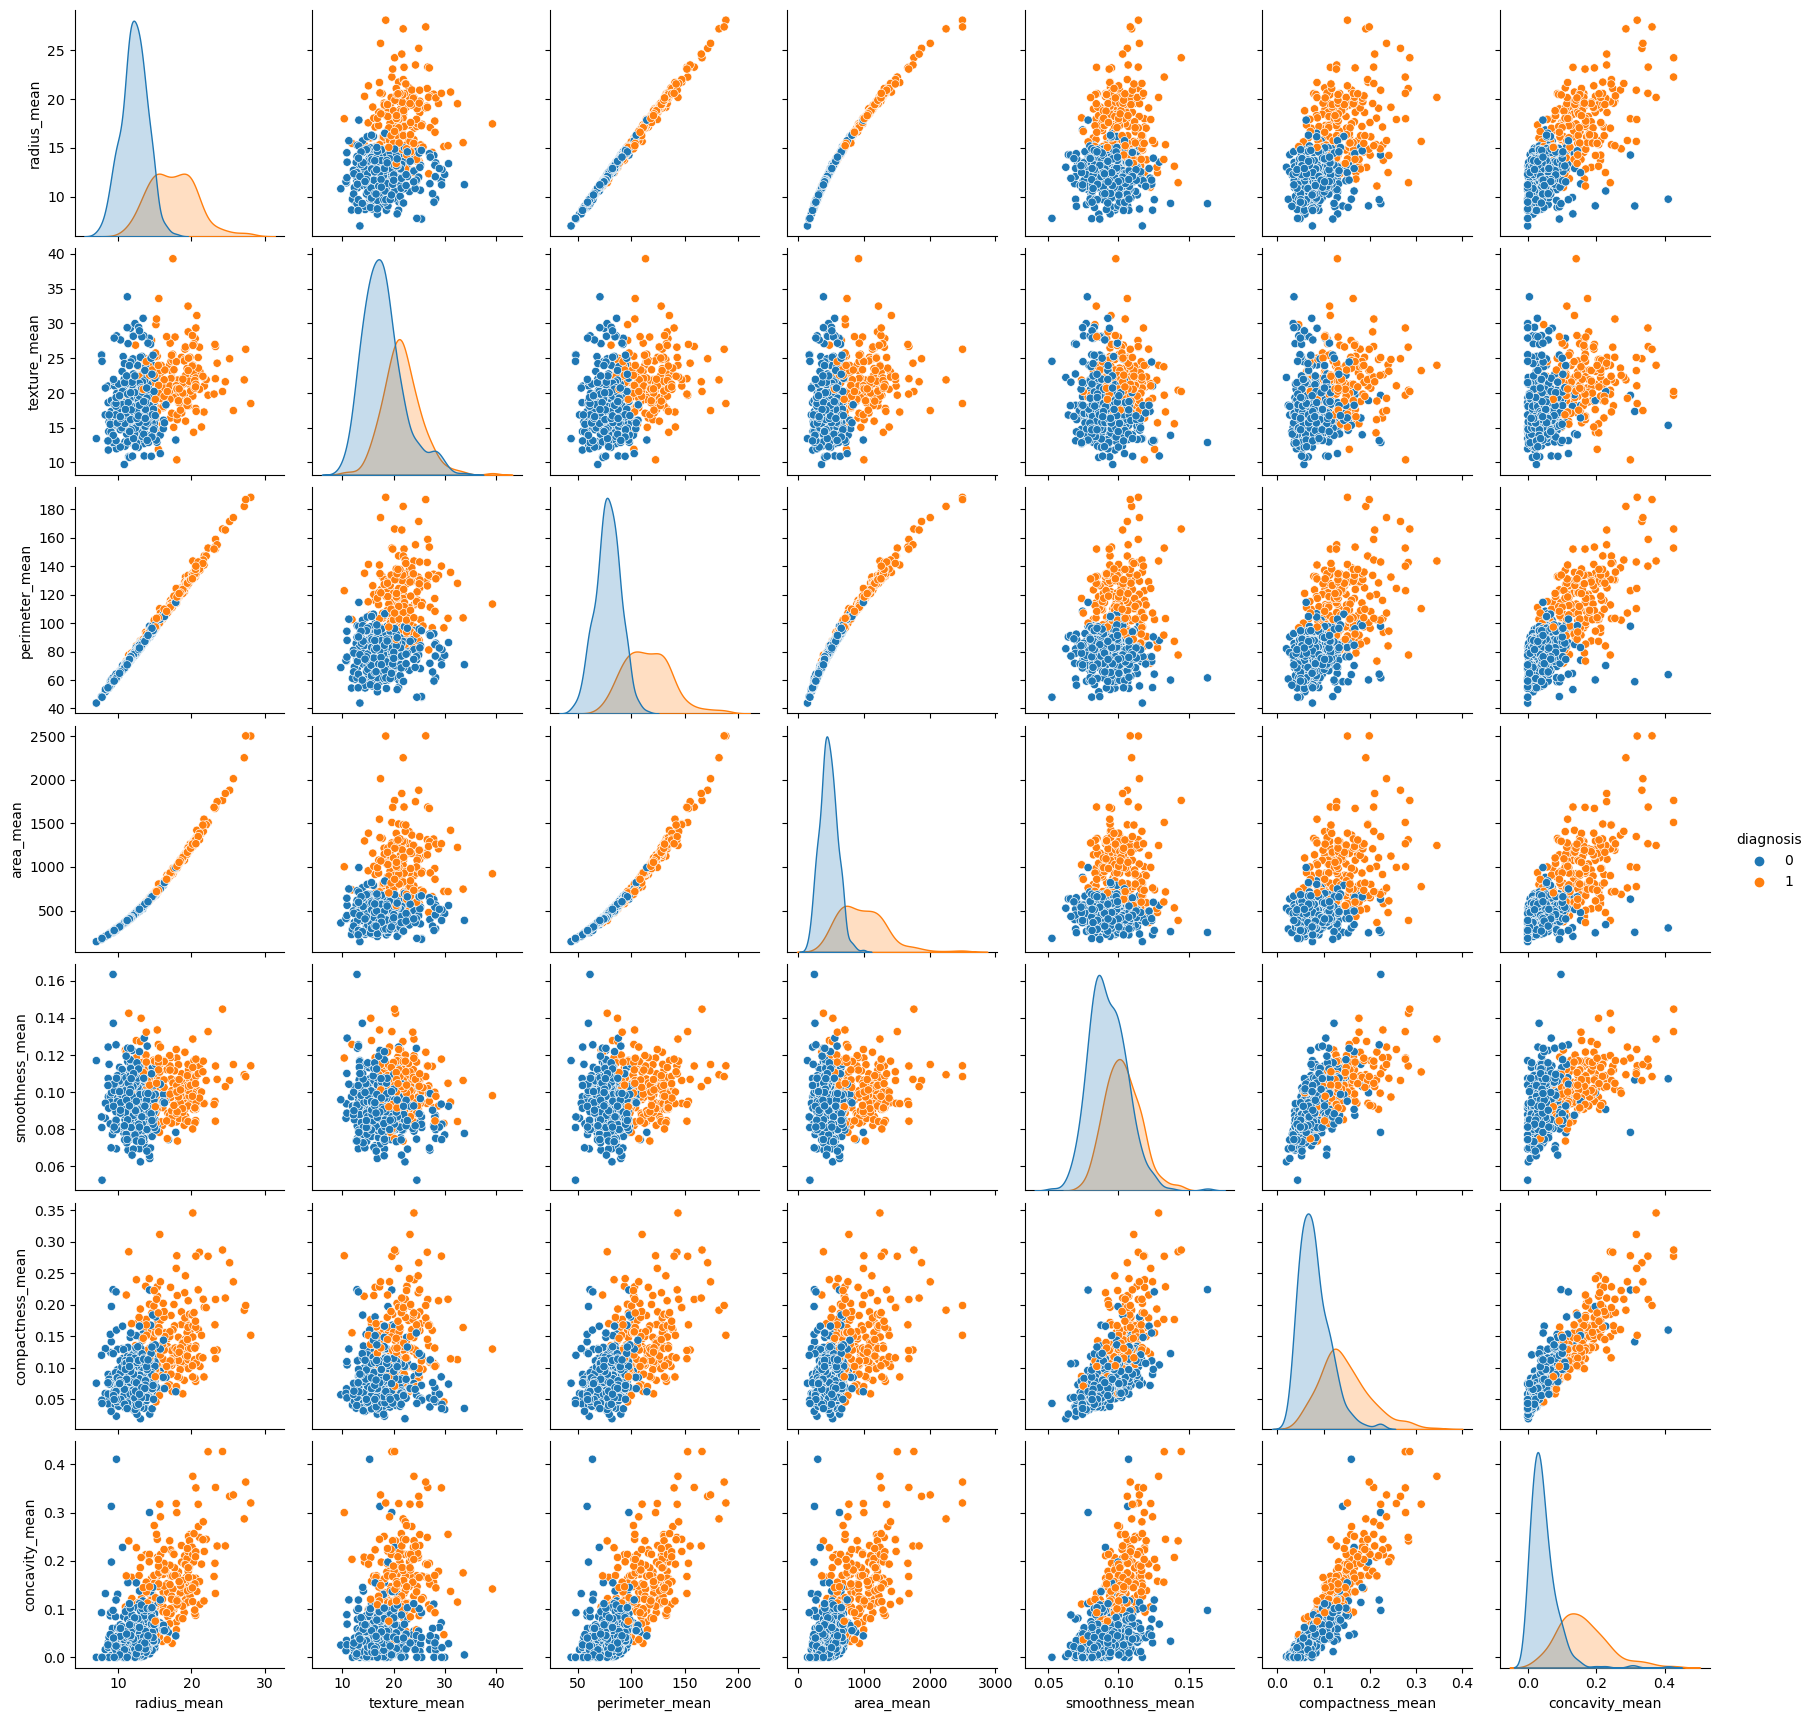

In [115]:
# Pairplot for "_mean" feature to see if any of them are correlated to each other
# Define features as a list
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']
sns.pairplot(cancer_df, vars=features,hue='diagnosis')

- In the density diagrams, malignant cases generally have higher values for many of the variables compared to benign cases.
- We can also observe clear positive correlations between some features in the scatterplots, radius_mean-perimeter_mean, radius_mean-area_mean, perimeter_mean-area mean, which completely makes sense since all of these are different measurements for size.
- smoothness_mean, compactness_mean, and concavity_mean seems to have high correlations.

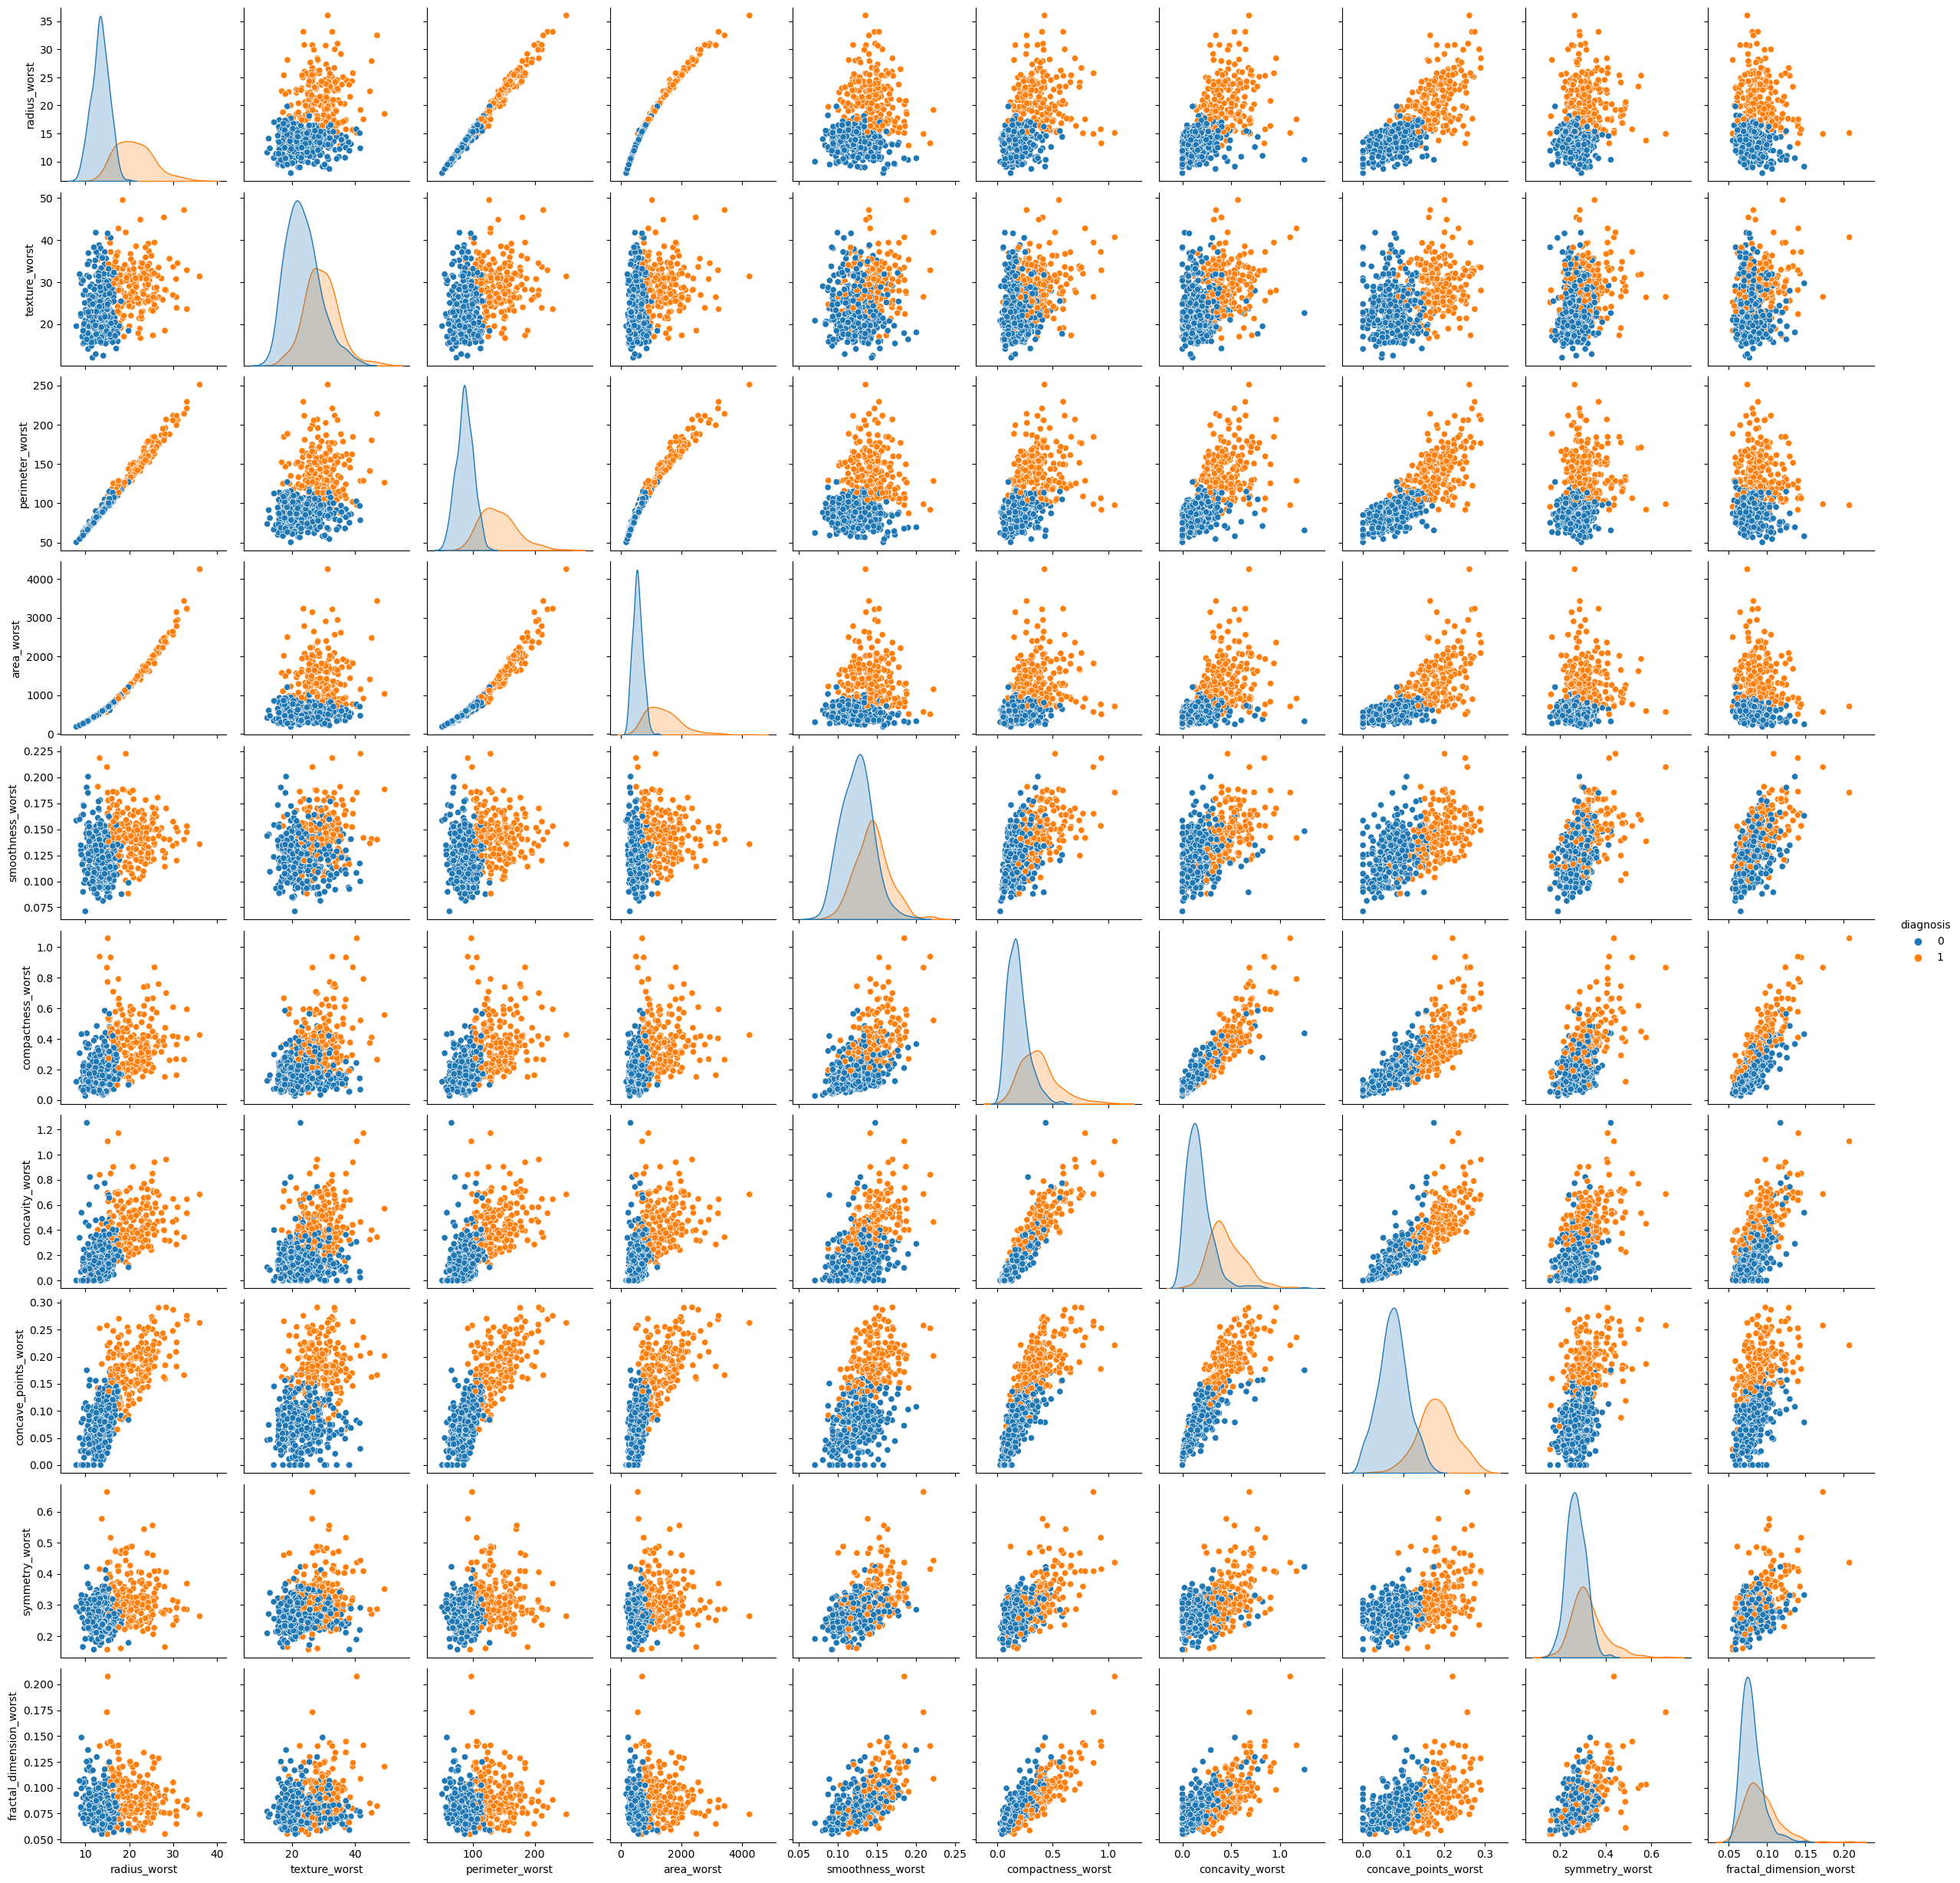

In [116]:
# Pairplot for "_worst" feature to see if any of them are correlated to each other
# Define features as a list
features = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
sns.pairplot(cancer_df, vars=features,hue='diagnosis')


The pair plots for the "worst" features tend to contain very similar information to the plots for the "mean" features.

To have a clearer view of the correlations between features, plotted a heatmap using Pearson correlation coefficients.

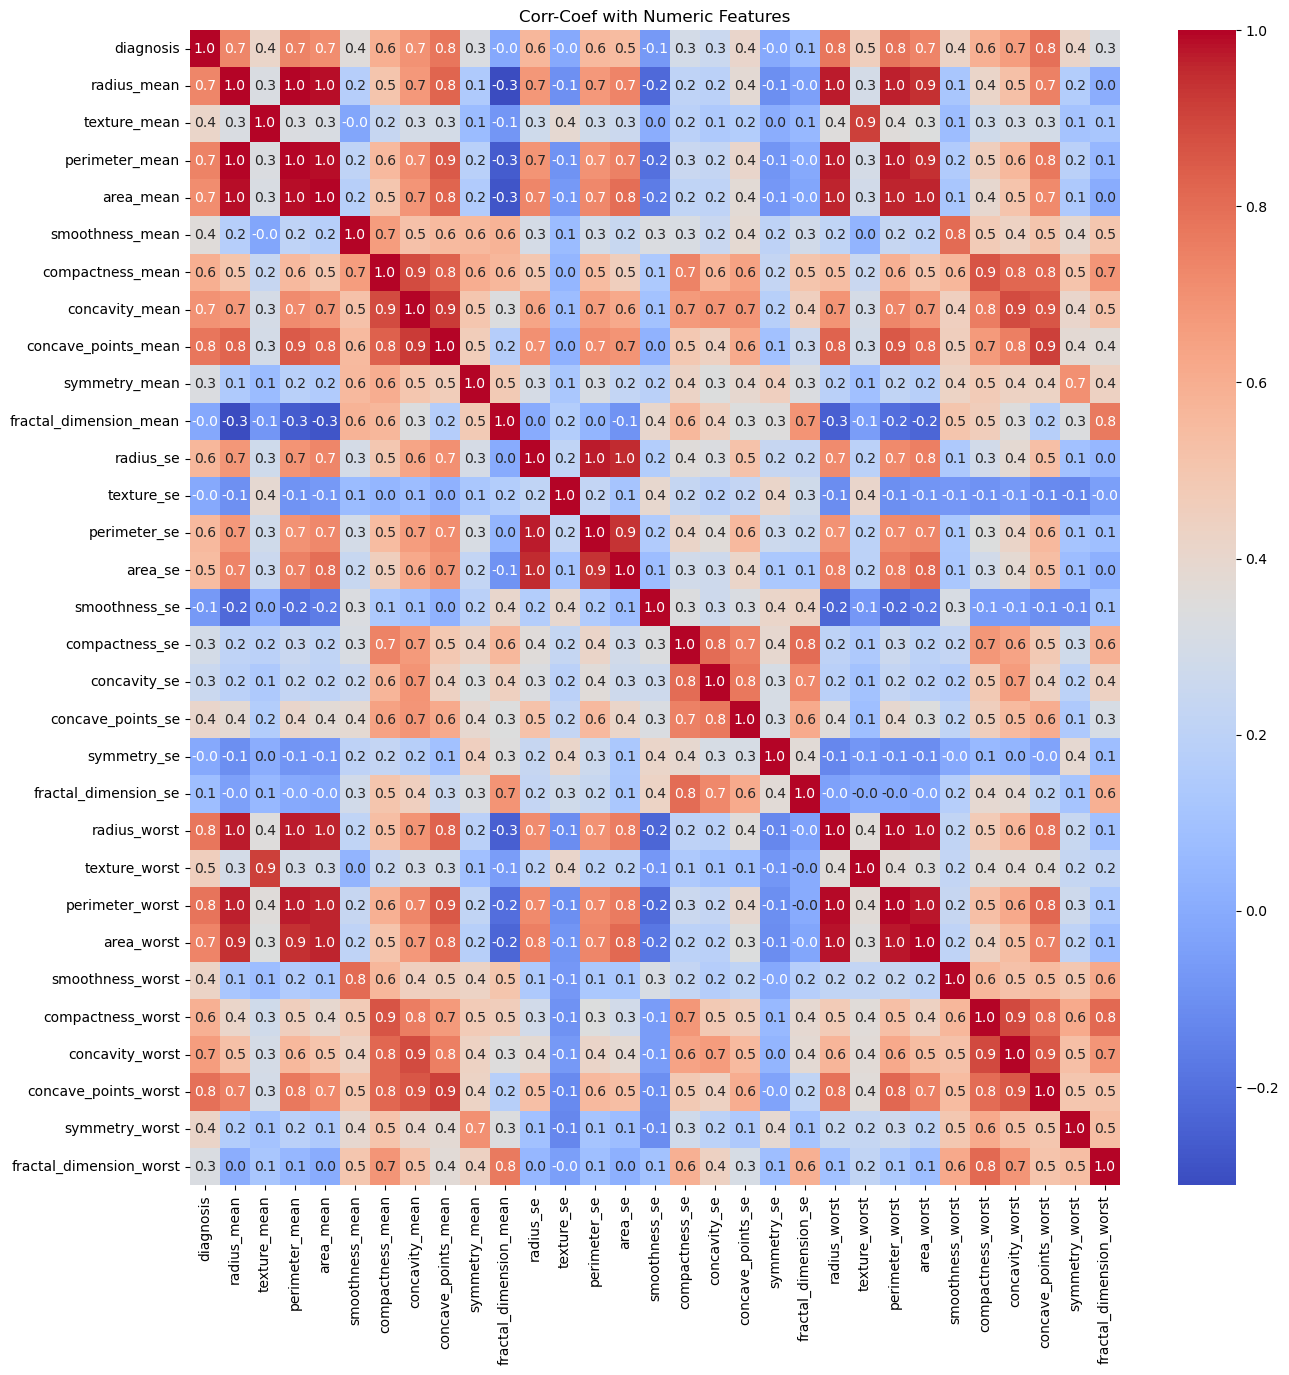

In [117]:
# Heatmap to identify any correlation between 2 features
corr_coef = cancer_df.iloc[:,0:].corr() # create a correlation-coefficient matrix

# Plot a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_coef, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Corr-Coef with Numeric Features")
plt.show()

**Perfect positive correlation(r = 1)**
- perimeter_mean, radius_mean
- area_mean, radius_mean
- radius_worst, radius_mean
- perimeter_worst, radius_mean
- perimeter_worst, perimeter_mean
- perimeter_worst, area_mean
- area_worst, area_mean
- area_se, radius_se
...

**Significant positive correlation(0.7 ≤ r ≤ 0.9)**
- diagnosis(dependent variable) with radius_mean, perimeter_mean, radius_mean, concavity_mean, concave_points_mean, radius_worst, perimeter_worst, area_worst, concavity_worst, concave_points_worst

→ These features appear to be primary for the model, however, we need to exclude independent variables that have high correlation to address the multicollinearity problem.

**Features selected**
- radius_mean
- texture_mean
- smoothness_mean
- compactness_mean
- concave_points_mean
- symmetry_mean
- radius_se
- concavity_se
- compactness_se
- concave_points_se
- smoothness_worst
- concavity_worst
- symmetry_worst
- fractal_dimension_worst

→ select based on corr, excluded features having r >= 0.9 with other features

#### 2. **Logistic Regression Model Development** (20 pts):
- Develop a logistic regression model to predict whether cancer is malignant or benign.
- Preprocess the data as necessary (handling missing values, encoding categorical variables, etc.).
- Explain the steps you took in preparing the data and developing the model.
- You might need to encode the values for your prediction.

In [118]:
cancer_df.head()
# diagnosis which is the only categorical variable is already replaced with 0,1 from previous question

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [119]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

When you try to fit the model with all variables, you'll get "LinAlgError: Singular matrix". This error occurs when the model contains features that are highly correlated to each other. Thus I tried to sort out features with high correlation coefficient as I mentioned in previous question.

In [120]:
# Extract certain columns for modeling
y = cancer_df.iloc[:,0]
X = cancer_df.iloc[:,[1,2,5,6,8,9,11,16,17,18,25,27,29,30]] # Features chosen from EDA process
X.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concave_points_mean  symmetry_mean  radius_se  compactness_se  \
0              0.14710         0.2419     1.0950         0.04904   
1              0.07017         0.1812     0.5435         0.01308   
2              0.12790         0.2069     0.7456         0.04006   
3              0.10520         0.2597     0.4956         0.07458   
4              0.10430         0.1809     0.7572         0.02461   

   concavity_se  concave_points_se  smoothness_worst  concavity_worst  \
0       0.05373            0.01587            0.1622           0.7119   
1       0.01860            0.01340            0.1238           0.2416   
2       0.03832            0.02058            0.1444           0.4504   
3       0.05661            0.01867            0.2098           0.6869   
4       0.05688            0.01885            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

In [121]:
# Conduct train_test_split
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.3,
                                                 random_state = 11)
feature_names = X.columns
labels = y.unique()

In [122]:
# Fit the Logistic regression model with train sets
logistic_model = sm.Logit(y_train, X_train).fit()

print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.077489
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                           13
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.8833
Time:                        17:35:56   Log-Likelihood:                -30.840
converged:                       True   LL-Null:                       -264.18
Covariance Type:            nonrobust   LLR p-value:                 1.726e-91
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
radius_mean                -0.0726      0.140     -0.518      0.604      -0.347  

#### 3. **Model Evaluation** (20 pts):
- Evaluate your logistic regression model using appropriate metrics (e.g., accuracy, R^2, RMSE (all out-of-sample)).
- Split the dataset into training and testing sets to perform this evaluation.
- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [123]:
# Out-of-sample accuracy, R^2, RMSE

# Predict the probability of malinant diagnosis
logistic_pred = logistic_model.predict(X_test)
logistic_pred_class = np.where(logistic_pred >= 0.5,1,0) # Create a target array and set the threshold at 0.5
# If sensitivity is main concern, we can increase the classification threshold.(decrease false positives while increasing false negatives)
logistic_pred_class

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [124]:
# Define RMSE using the mean squared error, accuracy and R^2 can be computed with the package directly
rmse = np.sqrt(mean_squared_error(y_test, logistic_pred_class))

print('accuracy:{:.4f}'.format(accuracy_score(y_test, logistic_pred_class)))
print('R_squared:{:.4f}'.format(r2_score(y_test, logistic_pred_class)))
print('RMSE:{:.4f}'.format(rmse))

accuracy:0.9357
R_squared:0.7197
RMSE:0.2536


**Evaluation**

- Accuracy = 93.57% : Accuracy is calculated through TP+TN / TP+TN+FN+FP, tells us to what extent the model correctly predicts the outcome, whether positive or negative. 93.57% is a high value, suggesting that in about 93.57% of the cases, the model correctly predicted the outcome.

- R^2 = 71.97% : R-squared of 71.97% would be considered good acceptable value, indicating that a substantial portion of the variance is explained by the model.

- RMSE (Root Mean Square Error) = 0.2356: The lower the RMSE, the better the model's performance. However, since RMSE does not have a specific target value that distinguishes it as good or bad, its value is relative. It should be compared with the RMSE of other models.

Overall, the model appears to perform well in terms of accuracy. However, as this is the only model trained, these values should be used as a benchmark and compared with other models.

#### 4. **Testing Interactions Between Features** (30 pts):
- Explore and test the interactions between different features in the dataset. Pay particular attention to interactions involving both categorical/dummy and continuous variables.
- For this excercise, use a linear regression rather than a logistic regression model.
- Discuss issues that occur when using a linear regression model to predict binary outcomes.
- Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
- Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
- Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

**Discuss issues that occur when using a linear regression model to predict binary outcomes.**

Linear regression is used when the aim of modeling is getting continuous outcome variables, and there are several problems of using linear regression to predict binary outcomes. 
- The biggest issue will be that in linear regression, the predicted values do not always fall between the 0-1 range, not aligning with the nature of probabilities in binary outcomes. For this reason, deciding on a cutoff point to separate 0/1 predictions isn't straightforward in linear regression, making it challenging to classify outcomes accurately.
- Coefficients in linear regression do not translate well into the probabilistic interpretation needed for binary outcomes.
Therefore, logistic regression is often more well-suited for classification problems like predicting binary outcomes. It's specifically designed to handle the 0/1 nature of these problems and provides more reliable and interpretable results in such cases.

In [125]:
# Extract certain columns for modeling
y = cancer_df['diagnosis'] # diagnosis as target
X2 = cancer_df.drop(['diagnosis'], axis=1) # all variables except for diagnosis are features
X2.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [126]:
# Conduct train_test_split
y = y[X2.index]
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,
                                                 test_size = 0.3,
                                                 random_state = 11)
feature_names = X2.columns
labels = y.unique()

**Fit a linear regression model without interaction terms for benchmark**


In [127]:
X2_train_sm = sm.add_constant(X2_train).reset_index(drop=True) # Add constant before running OLS
X2_test_sm = sm.add_constant(X2_test).reset_index(drop=True) 

In [128]:
# Reset the indices of both datasets
y_train = y_train.reset_index(drop=True)
X2_train_sm = X2_train_sm.reset_index(drop=True)
X2_train_sm.head()

const  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    1.0        14.90         22.53          102.10      685.0   
1    1.0        12.20         15.21           78.01      457.9   
2    1.0        11.60         12.84           74.34      412.6   
3    1.0        12.54         16.32           81.25      476.3   
4    1.0        13.27         14.76           84.74      551.7   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.09947           0.22250         0.27330              0.09711   
1          0.08673           0.06545         0.01994              0.01692   
2          0.08983           0.07525         0.04196              0.03350   
3          0.11580           0.10850         0.05928              0.03279   
4          0.07355           0.05055         0.03261              0.02648   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2041  ...         16.35          27.57           125.40   
1         0.1638  ...         13.75          21.38            91.11   
2         0.1620  ...         13.06          17.16            82.96   
3         0.1943  ...         13.57          21.40            86.67   
4         0.1386  ...         16.36          22.35           104.50   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       832.7            0.1419             0.7090           0.9019   
1       583.1            0.1256             0.1928           0.1167   
2       512.5            0.1431             0.1851           0.1922   
3       552.0            0.1580             0.1751           0.1889   
4       830.6            0.1006             0.1238           0.1350   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0               0.24750          0.2866                  0.11550  
1               0.05556          0.2661                  0.07961  
2               0.08449          0.2772                  0.08756  
3               0.08411          0.3155                  0.07538  
4               0.10010          0.2027                  0.06206  

[5 rows x 31 columns]

In [129]:
lm_model = sm.OLS(y_train,X2_train_sm).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     42.98
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          2.42e-101
Time:                        17:35:56   Log-Likelihood:                 22.950
No. Observations:                 398   AIC:                             16.10
Df Residuals:                     367   BIC:                             139.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.1092      0.509     -4.143      0.000      -3.110      -1.108
radius_mean                -0.2345      0.210     -1.114      0.266      -0.648       0.179
texture_mean                0.0014      0.010      0.140      0.889      -0.018       0.021
perimeter_mean              0.0287      0.031      0.936      0.350      -0.032       0.089
area_mean                   0.0002      0.001      0.392      0.695      -0.001       0.001
smoothness_mean            -2.4865      2.500     -0.995      0.321      -7.402       2.429
compactness_mean           -4.8766      1.613     -3.023      0.003      -8.048      -1.705
concavity_mean              0.4865      1.229      0.396      0.692      -1.931       2.904
concave_points_mean         5.0007      2.366      2.114      0.035       0.348       9.653
symmetry_mean               0.0448      0.918      0.049      0.961      -1.760       1.850
fractal_dimension_mean      1.8547      6.803      0.273      0.785     -11.523      15.233
radius_se                   0.3173      0.381      0.833      0.405      -0.432       1.066
texture_se                 -0.0364      0.045     -0.818      0.414      -0.124       0.051
perimeter_se                0.0025      0.054      0.046      0.964      -0.104       0.109
area_se                    -0.0008      0.002     -0.439      0.661      -0.004       0.003
smoothness_se              16.2251      7.794      2.082      0.038       0.899      31.552
compactness_se              1.1062      2.541      0.435      0.664      -3.891       6.103
concavity_se               -3.3156      1.530     -2.167      0.031      -6.324      -0.307
concave_points_se          14.0909      6.861      2.054      0.041       0.598      27.584
symmetry_se                -1.2383      3.313     -0.374      0.709      -7.753       5.277
fractal_dimension_se       -3.0795     14.360     -0.214      0.830     -31.317      25.158
radius_worst                0.2005      0.067      2.987      0.003       0.069       0.332
texture_worst               0.0140      0.009      1.636      0.103      -0.003       0.031
perimeter_worst            -0.0051      0.007     -0.714      0.476      -0.019       0.009
area_worst                 -0.0010      0.000     -2.677      0.008      -0.002      -0.000
smoothness_worst            1.6982      1.801      0.943      0.346      -1.844       5.241
compactness_worst           0.1706      0.475      0.359      0.719      -0.763       1.104
concavity_worst             0.4229      0.319      1.324      0.186      -0.205       1.051
concave_points_worst       -0.7943      1.107     -0.717      0.474      -2.972       1.383
symmetry_worst              1.0285      0.587      1.752      0.081      -0.126       2.183
fractal_dimension_worst     3.3116      2.979  

In [130]:
# Save the predicted values for OOS evaluation using test data
lm_pred = lm_model.predict(X2_test_sm) 

In [131]:
# Get OOS R^2 and RMSE. Accuracy can't be computed because the outcome variable of the dataset is binary, while outcome variable of linear regression is not binary.
rmse = np.sqrt(mean_squared_error(y_test, lm_pred))
print('RMSE:{:.4f}'.format(rmse))
print('R_squared:{:.4f}'.format(r2_score(y_test, lm_pred)))

RMSE:0.2432
R_squared:0.7422


**Fit a linear regression model with interaction terms**

In [132]:
# Add some interaction terms out of dataframe
X3 = X.copy() # copy the dataframe 

X3['diagnosis:radius_mean'] = cancer_df['diagnosis']*cancer_df['radius_mean'] # add interaction terms on top of the existing X variables
X3['diagnosis:texture_mean'] = cancer_df['diagnosis']*cancer_df['texture_mean']
X3['diagnosis:smoothness_mean'] = cancer_df['diagnosis']*cancer_df['smoothness_mean']
X3['diagnosis:compactness_mean'] = cancer_df['diagnosis']*cancer_df['compactness_mean']
X3['diagnosis:concave_points_mean'] = cancer_df['diagnosis']*cancer_df['concave_points_mean']
X3['diagnosis:symmetry_mean'] = cancer_df['diagnosis']*cancer_df['symmetry_mean']
X3['diagnosis:radius_se'] = cancer_df['diagnosis']*cancer_df['radius_se']
X3['diagnosis:concavity_se'] = cancer_df['diagnosis']*cancer_df['concavity_se']
X3['diagnosis:compactness_se'] = cancer_df['diagnosis']*cancer_df['compactness_se']
X3['diagnosis:concave_points_se'] = cancer_df['diagnosis']*cancer_df['concave_points_se']
X3['diagnosis:smoothness_worst'] = cancer_df['diagnosis']*cancer_df['smoothness_worst']
X3['diagnosis:concavity_worst'] = cancer_df['diagnosis']*cancer_df['concavity_worst']
X3['diagnosis:symmetry_worst'] = cancer_df['diagnosis']*cancer_df['symmetry_worst']
X3['diagnosis:fractal_dimension_worst'] = cancer_df['diagnosis']*cancer_df['fractal_dimension_worst']
X3.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concave_points_mean  symmetry_mean  radius_se  compactness_se  \
0              0.14710         0.2419     1.0950         0.04904   
1              0.07017         0.1812     0.5435         0.01308   
2              0.12790         0.2069     0.7456         0.04006   
3              0.10520         0.2597     0.4956         0.07458   
4              0.10430         0.1809     0.7572         0.02461   

   concavity_se  concave_points_se  ...  diagnosis:concave_points_mean  \
0       0.05373            0.01587  ...                        0.14710   
1       0.01860            0.01340  ...                        0.07017   
2       0.03832            0.02058  ...                        0.12790   
3       0.05661            0.01867  ...                        0.10520   
4       0.05688            0.01885  ...                        0.10430   

   diagnosis:symmetry_mean  diagnosis:radius_se  diagnosis:concavity_se  \
0                   0.2419               1.0950                 0.05373   
1                   0.1812               0.5435                 0.01860   
2                   0.2069               0.7456                 0.03832   
3                   0.2597               0.4956                 0.05661   
4                   0.1809               0.7572                 0.05688   

   diagnosis:compactness_se  diagnosis:concave_points_se  \
0                   0.04904                      0.01587   
1                   0.01308                      0.01340   
2                   0.04006                      0.02058   
3                   0.07458                      0.01867   
4                   0.02461                      0.01885   

   diagnosis:smoothness_worst  diagnosis:concavity_worst  \
0                      0.1622                     0.7119   
1                      0.1238                     0.2416   
2                      0.1444                     0.4504   
3                      0.2098                     0.6869   
4                      0.1374                     0.4000   

   diagnosis:symmetry_worst  diagnosis:fractal_dimension_worst  
0                    0.4601                            0.11890  
1                    0.2750                            0.08902  
2                    0.3613                            0.08758  
3                    0.6638                            0.17300  
4                    0.2364                            0.07678  

[5 rows x 28 columns]

In [133]:
# Conduct train_test_split
X3_train, X3_test, y_train, y_test = train_test_split(X3,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

In [134]:
X3_train_sm = sm.add_constant(X3_train).reset_index(drop=True) # Add constant before running OLS
X3_test_sm = sm.add_constant(X3_test).reset_index(drop=True) 

In [135]:
# Reset the indices of both datasets
y_train = y_train.reset_index(drop=True)
X3_train_sm = X3_train_sm.reset_index(drop=True)
X3_train_sm.head()

const  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0    1.0        14.90         22.53          0.09947           0.22250   
1    1.0        12.20         15.21          0.08673           0.06545   
2    1.0        11.60         12.84          0.08983           0.07525   
3    1.0        12.54         16.32          0.11580           0.10850   
4    1.0        13.27         14.76          0.07355           0.05055   

   concave_points_mean  symmetry_mean  radius_se  compactness_se  \
0              0.09711         0.2041     0.2530         0.06213   
1              0.01692         0.1638     0.2575         0.01418   
2              0.03350         0.1620     0.2315         0.01330   
3              0.03279         0.1943     0.2577         0.01567   
4              0.02648         0.1386     0.4057         0.01038   

   concavity_se  ...  diagnosis:concave_points_mean  diagnosis:symmetry_mean  \
0       0.07926  ...                        0.09711                   0.2041   
1       0.01051  ...                        0.00000                   0.0000   
2       0.01693  ...                        0.00000                   0.0000   
3       0.02575  ...                        0.00000                   0.0000   
4       0.01358  ...                        0.00000                   0.0000   

   diagnosis:radius_se  diagnosis:concavity_se  diagnosis:compactness_se  \
0                0.253                 0.07926                   0.06213   
1                0.000                 0.00000                   0.00000   
2                0.000                 0.00000                   0.00000   
3                0.000                 0.00000                   0.00000   
4                0.000                 0.00000                   0.00000   

   diagnosis:concave_points_se  diagnosis:smoothness_worst  \
0                      0.02234                      0.1419   
1                      0.00000                      0.0000   
2                      0.00000                      0.0000   
3                      0.00000                      0.0000   
4                      0.00000                      0.0000   

   diagnosis:concavity_worst  diagnosis:symmetry_worst  \
0                     0.9019                    0.2866   
1                     0.0000                    0.0000   
2                     0.0000                    0.0000   
3                     0.0000                    0.0000   
4                     0.0000                    0.0000   

   diagnosis:fractal_dimension_worst  
0                             0.1155  
1                             0.0000  
2                             0.0000  
3                             0.0000  
4                             0.0000  

[5 rows x 29 columns]

In [136]:
# Fit the linear regression model again, now leave only 3 interaction features with significant p values.
interaction_reg1 = sm.OLS(y_train,X3_train_sm).fit()
interaction_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8881.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:35:57   Log-Likelihood:                 1019.5
No. Observations:                 398   AIC:                            -1981.
Df Residuals:                     369   BIC:                            -1865.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.3129      0.024     12.962      0.000       0.265       0.360
radius_mean                          -0.0103      0.001    -10.100      0.000      -0.012      -0.008
texture_mean                         -0.0013      0.000     -3.968      0.000      -0.002      -0.001
smoothness_mean                      -0.6113      0.229     -2.665      0.008      -1.062      -0.160
compactness_mean                      0.4432      0.104      4.261      0.000       0.239       0.648
concave_points_mean                   0.4910      0.196      2.506      0.013       0.106       0.876
symmetry_mean                        -0.1740      0.084     -2.060      0.040      -0.340      -0.008
radius_se                            -0.0076      0.015     -0.523      0.602      -0.036       0.021
compactness_se                       -0.4058      0.220     -1.849      0.065      -0.837       0.026
concavity_se                         -0.0505      0.095     -0.531      0.596      -0.238       0.137
concave_points_se                    -0.4726      0.594     -0.796      0.426      -1.640       0.695
smoothness_worst                     -0.2076      0.139     -1.494      0.136      -0.481       0.066
concavity_worst                       0.0461      0.020      2.257      0.025       0.006       0.086
symmetry_worst                       -0.0466      0.046     -1.004      0.316      -0.138       0.045
fractal_dimension_worst              -0.9627      0.173     -5.551      0.000      -1.304      -0.622
diagnosis:radius_mean                 0.0291      0.001     28.884      0.000       0.027       0.031
diagnosis:texture_mean                0.0033      0.001      6.315      0.000       0.002       0.004
diagnosis:smoothness_mean             4.1290      0.381     10.825      0.000       3.379       4.879
diagnosis:compactness_mean           -0.5617      0.143     -3.921      0.000      -0.843      -0.280
diagnosis:concave_points_mean        -2.4056      0.243     -9.900      0.000      -2.883      -1.928
diagnosis:symmetry_mean               0.8808      0.138      6.366      0.000       0.609       1.153
diagnosis:radius_se                  -0.0200      0.016     -1.237      0.217      -0.052       0.012
diagnosis:concavity_se               -0.5142      0.261     -1.971      0.049      -1.027      -0.001
diagnosis:compactness_se              0.4170      0.330      1.262      0.208      -0.233       1.067
diagnosis:concave_points_se           3.6182      0.764      4.739      0.000       2.117       5.120
diagnosis:smoothness_worst            0.0035      0.209      0.017      0.987      -0.408       0.415
diagnosis:concavity_worst            -0.0028      0.030     -0.094      0.925      -0.062       0.056
diagnosis:symmetry_wors

In [137]:
# Save the predicted values for OOS evaluation using test data
interaction_reg_pred1 = interaction_reg1.predict(X3_test_sm) 

In [138]:
# Get OOS R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, interaction_reg_pred1))
print('RMSE:{:.4f}'.format(rmse))
print('R_squared:{:.4f}'.format(r2_score(y_test, interaction_reg_pred1)))

RMSE:0.0177
R_squared:0.9986


**Now Fit another linear regression model, with only 3 interaction terms which was significant**

In [139]:
# Add some interaction terms out of dataframe
X4= X.copy() # copy the dataframe 

X4['diagnosis:radius_mean'] = cancer_df['diagnosis']*cancer_df['radius_mean'] # add interaction terms on top of the existing X variables
X4['diagnosis:smoothness_mean'] = cancer_df['diagnosis']*cancer_df['smoothness_mean']
X4['diagnosis:concave_points_mean'] = cancer_df['diagnosis']*cancer_df['concave_points_mean']
X4.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concave_points_mean  symmetry_mean  radius_se  compactness_se  \
0              0.14710         0.2419     1.0950         0.04904   
1              0.07017         0.1812     0.5435         0.01308   
2              0.12790         0.2069     0.7456         0.04006   
3              0.10520         0.2597     0.4956         0.07458   
4              0.10430         0.1809     0.7572         0.02461   

   concavity_se  concave_points_se  smoothness_worst  concavity_worst  \
0       0.05373            0.01587            0.1622           0.7119   
1       0.01860            0.01340            0.1238           0.2416   
2       0.03832            0.02058            0.1444           0.4504   
3       0.05661            0.01867            0.2098           0.6869   
4       0.05688            0.01885            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  diagnosis:radius_mean  \
0          0.4601                  0.11890                  17.99   
1          0.2750                  0.08902                  20.57   
2          0.3613                  0.08758                  19.69   
3          0.6638                  0.17300                  11.42   
4          0.2364                  0.07678                  20.29   

   diagnosis:smoothness_mean  diagnosis:concave_points_mean  
0                    0.11840                        0.14710  
1                    0.08474                        0.07017  
2                    0.10960                        0.12790  
3                    0.14250                        0.10520  
4                    0.10030                        0.10430

In [140]:
# Conduct train_test_split
X4_train, X4_test, y_train, y_test = train_test_split(X4,y,
                                                 test_size = 0.3,
                                                 random_state = 11)

In [141]:
X4_train_sm = sm.add_constant(X4_train).reset_index(drop=True) # Add constant before running OLS
X4_test_sm = sm.add_constant(X4_test).reset_index(drop=True) 

In [142]:
# Reset the indices of both datasets
y_train = y_train.reset_index(drop=True)
X4_train_sm = X4_train_sm.reset_index(drop=True)
X4_train_sm.head()

const  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0    1.0        14.90         22.53          0.09947           0.22250   
1    1.0        12.20         15.21          0.08673           0.06545   
2    1.0        11.60         12.84          0.08983           0.07525   
3    1.0        12.54         16.32          0.11580           0.10850   
4    1.0        13.27         14.76          0.07355           0.05055   

   concave_points_mean  symmetry_mean  radius_se  compactness_se  \
0              0.09711         0.2041     0.2530         0.06213   
1              0.01692         0.1638     0.2575         0.01418   
2              0.03350         0.1620     0.2315         0.01330   
3              0.03279         0.1943     0.2577         0.01567   
4              0.02648         0.1386     0.4057         0.01038   

   concavity_se  concave_points_se  smoothness_worst  concavity_worst  \
0       0.07926           0.022340            0.1419           0.9019   
1       0.01051           0.005142            0.1256           0.1167   
2       0.01693           0.006884            0.1431           0.1922   
3       0.02575           0.011610            0.1580           0.1889   
4       0.01358           0.010820            0.1006           0.1350   

   symmetry_worst  fractal_dimension_worst  diagnosis:radius_mean  \
0          0.2866                  0.11550                   14.9   
1          0.2661                  0.07961                    0.0   
2          0.2772                  0.08756                    0.0   
3          0.3155                  0.07538                    0.0   
4          0.2027                  0.06206                    0.0   

   diagnosis:smoothness_mean  diagnosis:concave_points_mean  
0                    0.09947                        0.09711  
1                    0.00000                        0.00000  
2                    0.00000                        0.00000  
3                    0.00000                        0.00000  
4                    0.00000                        0.00000

In [143]:
# Fit the linear regression model again, now leave only 3 interaction features with significant p values.
interaction_reg2 = sm.OLS(y_train,X4_train_sm).fit()
interaction_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9034.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:35:57   Log-Likelihood:                 917.92
No. Observations:                 398   AIC:                            -1800.
Df Residuals:                     380   BIC:                            -1728.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2531      0.028      8.992      0.000       0.198       0.308
radius_mean                      -0.0105      0.001     -8.726      0.000      -0.013      -0.008
texture_mean                    -8.4e-05      0.000     -0.252      0.801      -0.001       0.001
smoothness_mean                  -1.1249      0.229     -4.919      0.000      -1.574      -0.675
compactness_mean                  0.4268      0.087      4.919      0.000       0.256       0.597
concave_points_mean               0.1930      0.189      1.019      0.309      -0.180       0.566
symmetry_mean                     0.1176      0.085      1.389      0.166      -0.049       0.284
radius_se                        -0.0341      0.008     -4.444      0.000      -0.049      -0.019
compactness_se                   -0.3469      0.171     -2.029      0.043      -0.683      -0.011
concavity_se                     -0.5039      0.094     -5.386      0.000      -0.688      -0.320
concave_points_se                 2.4922      0.451      5.526      0.000       1.605       3.379
smoothness_worst                 -0.3274      0.128     -2.563      0.011      -0.578      -0.076
concavity_worst                   0.0582      0.018      3.319      0.001       0.024       0.093
symmetry_worst                   -0.0125      0.035     -0.355      0.723      -0.082       0.057
fractal_dimension_worst          -0.4676      0.150     -3.124      0.002      -0.762      -0.173
diagnosis:radius_mean             0.0354      0.001     38.727      0.000       0.034       0.037
diagnosis:smoothness_mean         6.6477      0.132     50.448      0.000       6.389       6.907
diagnosis:concave_points_mean    -3.1089      0.155    -20.111      0.000      -3.413      -2.805
==============================================================================
Omnibus:                       16.726   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.635
Skew:                           0.228   Prob(JB):                     1.35e-07
Kurtosis:                       4.304   Cond. No.                     9.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
# Save the predicted values for OOS evaluation using test data
interaction_reg_pred2 = interaction_reg2.predict(X4_test_sm) 

In [145]:
# Get OOS R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, interaction_reg_pred2))
print('RMSE:{:.4f}'.format(rmse))
print('R_squared:{:.4f}'.format(r2_score(y_test, interaction_reg_pred2)))

RMSE:0.0230
R_squared:0.9977


**Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.**

- **Model without interactions:** R^2 74.2%, RMSE 0.2432
- **Model with interations:** R^2 99.8%, RMSE 0.0230

- **Influence of the interactions:** The inclusion of interaction terms significantly improved the model's ability to explain the variability in the data, as seen in the higher R^2. Also, the model with interactions has much lower RMSE value compared to the model without interactions. This suggests that the model with interactions predicts more accurately.

- **Interpretation of interaction terms:**
The interaction term between 'diagnosis' and other independent features ('radius_mean', 'smoothness_mean', 'concave_points_mean') indicates how the effect of these independent features on the outcome varies with the diagnosis status, which is also the outcome variable of this model. When interpreting the coefficients, we should remember that the baseline is 'diagnosis = 0', or a benign diagnosis, meaning that the coefficients represent the relative number of malignant cases compared to benign cases. A positive coefficient for these interaction terms involving 'radius_mean' and 'smoothness_mean' suggests that an increase in 'radius_mean' and 'smoothness_mean' has a more significant positive impact on the outcome when the diagnosis is malignant, compared to when it is benign. On the other hand, the negative coefficient of 'diagnosis:concave_points_mean' indicates that 'concave_points_mean' has a more substantial negative impact on the outcome when the diagnosis is malignant.

#### 5. **Feature Selection and Cross-Validation: Full vs. Reduced Model** (15 pts):
- Create a reduced model using only a subset of significant predictors. You can use methods like FDR Cutoff, forward selection, backward elimination, or any other appropriate feature selection technique.
- Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.
- Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why.

**Find a subset of sifnificant predictors using FDR Cutoff method**

In [146]:
# Use X and y defined in question 2
# logistic_model trained in question 2 is the full model
p_values = logistic_model.pvalues # Extract p-values from the model summary
p_values

radius_mean                0.604178
texture_mean               0.000889
smoothness_mean            0.000921
compactness_mean           0.159679
concave_points_mean        0.000079
symmetry_mean              0.035531
radius_se                  0.000233
compactness_se             0.598820
concavity_se               0.117485
concave_points_se          0.773484
smoothness_worst           0.007503
concavity_worst            0.008704
symmetry_worst             0.009012
fractal_dimension_worst    0.111083
dtype: float64

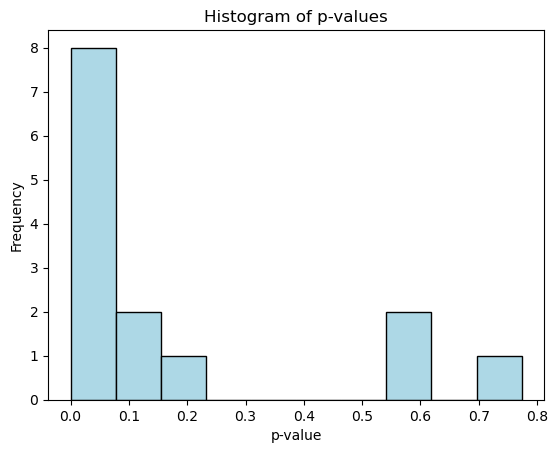

In [147]:
# Plot the histogram of p-values
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

8 features are significant at 10% significance level

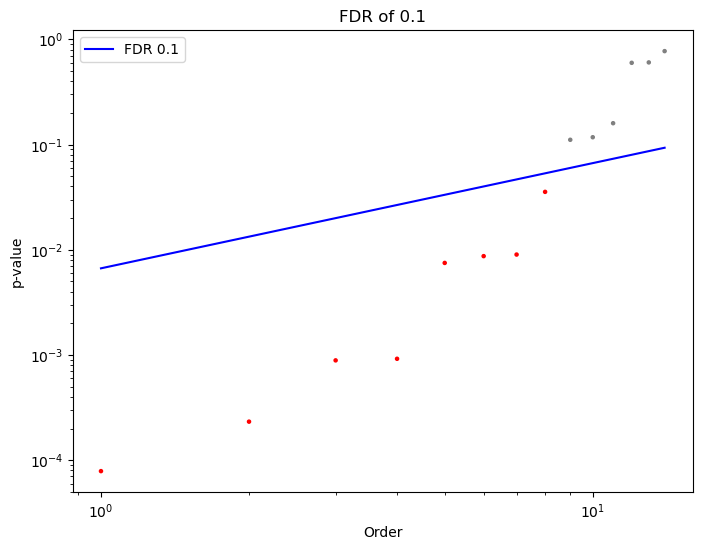

Threshold p-value at 10% FDR: 0.0355


In [148]:
def fdr_cut(pvals, q=0.1):
    """
    Determine the threshold p-value at a given FDR level and plot the p-values.

    Parameters:
        pvals (list or array): A list or array of p-values.
        q (float): The desired FDR level.

    Returns:
        float: The threshold p-value at the given FDR level.
    """
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

# Apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")

In [149]:
# Identify significant predictors based on the threshold p-value
significant_predictors = p_values[p_values <= 0.0355].index.tolist()

# Include the dependent variable 'diagnosis' in the selected columns
selected_columns = ['diagnosis'] + significant_predictors
selected_columns

['diagnosis',
 'texture_mean',
 'smoothness_mean',
 'concave_points_mean',
 'radius_se',
 'smoothness_worst',
 'concavity_worst',
 'symmetry_worst']

Now we got the list of features used for reduced model.

**Create a reduced model using only a subset of significant predictors**

First, train the full model using 10-fold cross-validation and compute metrics(Accuracy, R^2, RMSE) for benchmark.

In [150]:
# Prepare the data for the new model
X_cut = cancer_df[selected_columns].drop('diagnosis', axis=1) # no constant required here
y_cut = cancer_df['diagnosis']

In [151]:
# Define K for K-Fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

# Initialize list to store metrics
accuracies = []
r2_scores = []
rmses = []

# Perform K-Fold Cross-Validation
for train_indices, test_indices in kfold.split(X):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y_cut.iloc[train_indices], y_cut.iloc[test_indices]

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, pred)
    r2 = r2_score(y_test, prob)
    rmse = np.sqrt(mean_squared_error(y_test, prob))

    accuracies.append(accuracy)
    r2_scores.append(r2)
    rmses.append(rmse)

print("Average Accuracy:", np.mean(accuracies))
print("Average R-Squared:", np.mean(r2_scores))
print("Average RMSE:", np.mean(rmses))

Average Accuracy: 0.9332080200501253
Average R-Squared: 0.7942241506198796
Average RMSE: 0.2157378100844011


Next, train the reduced model (using significant predictors) using 10-fold cross-validation, and compute the metrics.

In [152]:
# Define K for K-Fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

# Initialize list to store metrics
accuracies = []
r2_scores = []
rmses = []

# Perform K-Fold Cross-Validation
for train_indices, test_indices in kfold.split(X_cut):
    X_train, X_test = X_cut.iloc[train_indices], X_cut.iloc[test_indices]
    y_train, y_test = y_cut.iloc[train_indices], y_cut.iloc[test_indices]

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, pred)
    r2 = r2_score(y_test, prob)
    rmse = np.sqrt(mean_squared_error(y_test, prob))

    accuracies.append(accuracy)
    r2_scores.append(r2)
    rmses.append(rmse)

print("Average Accuracy:", np.mean(accuracies))
print("Average R-Squared:", np.mean(r2_scores))
print("Average RMSE:", np.mean(rmses))

Average Accuracy: 0.9015977443609022
Average R-Squared: 0.6697532701635711
Average RMSE: 0.27521185217951905


**Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors)**


**Full model(Used 14 X variables, 10 fold CV)**
- Average Accuracy: 0.9332
- Average R-Squared: 0.7942
- Average RMSE: 0.2157

**Reduced model(Used 7 X variables, 10 fold CV)**
- Average Accuracy: 0.9016
- Average R-Squared: 0.6698
- Average RMSE: 0.2752

→ Overall full model performs better when considered higher accuracy, higher R^2, and lower RMSE.



**Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why**

Benchmark: Full model, K = from 2 to 10

In [153]:
# Initialize dictionaries to store average metrics
average_accuracies_f = {}
average_r2_scores_f = {}
average_rmses_f = {}

# Try different numbers of folds with for loop
for n_folds in range(2, 11):
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=11)

    # Initialize list to store metrics
    accuracies_f = []
    r2_scores_f = []
    rmses_f = []

    # Perform K-Fold Cross-Validation
    for train_indices, test_indices in kfold.split(X):
        X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
        y_train, y_test = y_cut.iloc[train_indices], y_cut.iloc[test_indices]

        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train) # Fit model using only training set

        pred = model.predict(X_test)
        prob = model.predict_proba(X_test)[:,1]

        accuracies_f.append(accuracy_score(y_test, pred)) # append out of sample metrics to the list
        r2_scores_f.append(r2_score(y_test, prob))
        rmses_f.append(np.sqrt(mean_squared_error(y_test, prob)))

    # Store average metrics for the current fold configuration
    average_accuracies_f[n_folds] = np.mean(accuracies_f)
    average_r2_scores_f[n_folds] = np.mean(r2_scores_f)
    average_rmses_f[n_folds] = np.mean(rmses_f)

# Display the results
for n_folds in range(2, 11):
    print(f"{n_folds} Folds: Accuracy = {average_accuracies_f[n_folds]}, R-Squared = {average_r2_scores_f[n_folds]}, RMSE = {average_rmses_f[n_folds]}")

2 Folds: Accuracy = 0.9279775142080553, R-Squared = 0.7637353260211406, RMSE = 0.23369943162131424
3 Folds: Accuracy = 0.9297410192147035, R-Squared = 0.7772990168713476, RMSE = 0.22716299566788015
4 Folds: Accuracy = 0.9297375160051217, R-Squared = 0.7833999410544343, RMSE = 0.2236593023381778
5 Folds: Accuracy = 0.9332557056357708, R-Squared = 0.7857369670343886, RMSE = 0.2217056850315618
6 Folds: Accuracy = 0.931485628966032, R-Squared = 0.7892200595475329, RMSE = 0.21984490364658782
7 Folds: Accuracy = 0.9315395534907729, R-Squared = 0.7893119645950523, RMSE = 0.21982113856209518
8 Folds: Accuracy = 0.9332208528951487, R-Squared = 0.7909873315622737, RMSE = 0.2179325565047977
9 Folds: Accuracy = 0.9350473985890653, R-Squared = 0.7904589334474381, RMSE = 0.21787423805720307
10 Folds: Accuracy = 0.9332080200501253, R-Squared = 0.7942241506198796, RMSE = 0.2157378100844011


Reduced model, K = from 2 to 10

In [154]:
# Initialize dictionaries to store average metrics
average_accuracies_r = {}
average_r2_scores_r = {}
average_rmses_r = {}

# Try different numbers of folds with for loop
for n_folds in range(2, 11):
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=11)

    # Initialize list to store metrics
    accuracies_r = []
    r2_scores_r = []
    rmses_r = []

    # Perform K-Fold Cross-Validation
    for train_indices, test_indices in kfold.split(X_cut):
        X_train, X_test = X_cut.iloc[train_indices], X_cut.iloc[test_indices]
        y_train, y_test = y_cut.iloc[train_indices], y_cut.iloc[test_indices]

        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train) # Fit model using only training set

        pred = model.predict(X_test)
        prob = model.predict_proba(X_test)[:,1]

        accuracies_r.append(accuracy_score(y_test, pred)) # append out of sample metrics to the list
        r2_scores_r.append(r2_score(y_test, prob))
        rmses_r.append(np.sqrt(mean_squared_error(y_test, prob)))

    # Store average metrics for the current fold configuration
    average_accuracies_r[n_folds] = np.mean(accuracies_r)
    average_r2_scores_r[n_folds] = np.mean(r2_scores_r)
    average_rmses_r[n_folds] = np.mean(rmses_r)

# Display the results
for n_folds in range(2, 11):
    print(f"{n_folds} Folds: Accuracy = {average_accuracies_r[n_folds]}, R-Squared = {average_r2_scores_r[n_folds]}, RMSE = {average_rmses_r[n_folds]}")

2 Folds: Accuracy = 0.8822831727205338, R-Squared = 0.6274791881444123, RMSE = 0.2949723828721745
3 Folds: Accuracy = 0.8928153717627402, R-Squared = 0.6493066503403576, RMSE = 0.28571457020284186
4 Folds: Accuracy = 0.8963729932039791, R-Squared = 0.6578392866220203, RMSE = 0.28185178006508294
5 Folds: Accuracy = 0.8998447446048751, R-Squared = 0.6625057352071153, RMSE = 0.2803042861395117
6 Folds: Accuracy = 0.8998506905561777, R-Squared = 0.6639974344240807, RMSE = 0.2787007055478537
7 Folds: Accuracy = 0.8963737256420183, R-Squared = 0.6624414154686873, RMSE = 0.2777670918901769
8 Folds: Accuracy = 0.9016040688575899, R-Squared = 0.6639168354382572, RMSE = 0.27772616917836457
9 Folds: Accuracy = 0.9034667107583775, R-Squared = 0.6647727075556266, RMSE = 0.276677904453612
10 Folds: Accuracy = 0.9015977443609022, R-Squared = 0.6697532701635711, RMSE = 0.27521185217951905


In [155]:
# Create DataFrames storing all the metrics collected, both for full and reduced model.
metrics_df_full = pd.DataFrame({
    "Model": "Full",
    "Folds": range(2,11),
    "Accuracy": [average_accuracies_f[n] for n in range(2, 11)],
    "R-Squared": [average_r2_scores_f[n] for n in range(2, 11)],
    "RMSE": [average_rmses_f[n] for n in range(2, 11)]
})

metrics_df_reduced = pd.DataFrame({
    "Model": "Reduced",
    "Folds": range(2,11),
    "Accuracy": [average_accuracies_r[n] for n in range(2, 11)],
    "R-Squared": [average_r2_scores_r[n] for n in range(2, 11)],
    "RMSE": [average_rmses_r[n] for n in range(2, 11)]
})

#metrics_df_reduced

# Merge the DataFrames
metrics_df_all = pd.concat([metrics_df_full,metrics_df_reduced])

metrics_df_all

Model  Folds  Accuracy  R-Squared      RMSE
0     Full      2  0.927978   0.763735  0.233699
1     Full      3  0.929741   0.777299  0.227163
2     Full      4  0.929738   0.783400  0.223659
3     Full      5  0.933256   0.785737  0.221706
4     Full      6  0.931486   0.789220  0.219845
5     Full      7  0.931540   0.789312  0.219821
6     Full      8  0.933221   0.790987  0.217933
7     Full      9  0.935047   0.790459  0.217874
8     Full     10  0.933208   0.794224  0.215738
0  Reduced      2  0.882283   0.627479  0.294972
1  Reduced      3  0.892815   0.649307  0.285715
2  Reduced      4  0.896373   0.657839  0.281852
3  Reduced      5  0.899845   0.662506  0.280304
4  Reduced      6  0.899851   0.663997  0.278701
5  Reduced      7  0.896374   0.662441  0.277767
6  Reduced      8  0.901604   0.663917  0.277726
7  Reduced      9  0.903467   0.664773  0.276678
8  Reduced     10  0.901598   0.669753  0.275212

**Accuracy**
- Full model demonstrates better performance across all folds.
- K=9 exhibits the best performance.

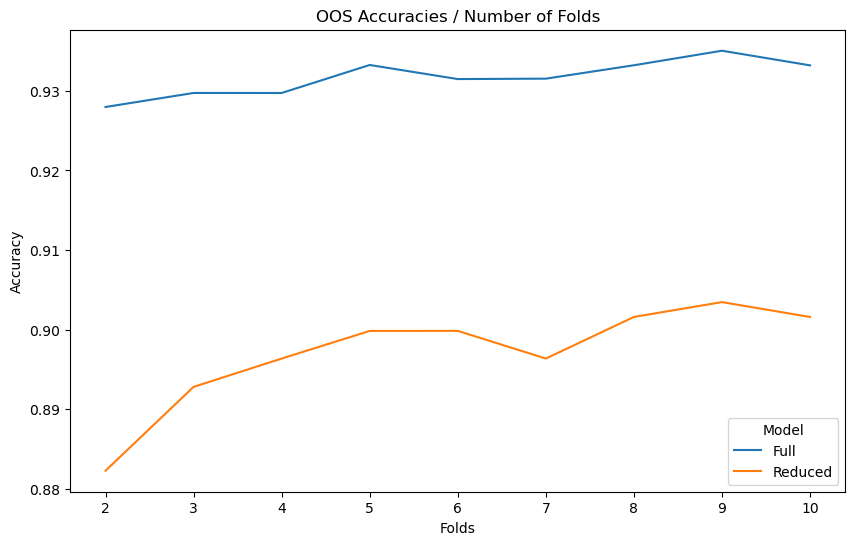

In [156]:
# Visualize the results to clearly compare the performance with the dataframe

## Accuracy
labels = ["Full", "Reduced"]
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
sns.lineplot(data=metrics_df_all, x = 'Folds', y= 'Accuracy', hue='Model')

plt.title("OOS Accuracies / Number of Folds")
plt.show()

**R^2**
- Full model demonstrates better performance across all folds.
- K=10 exhibits the best performance.

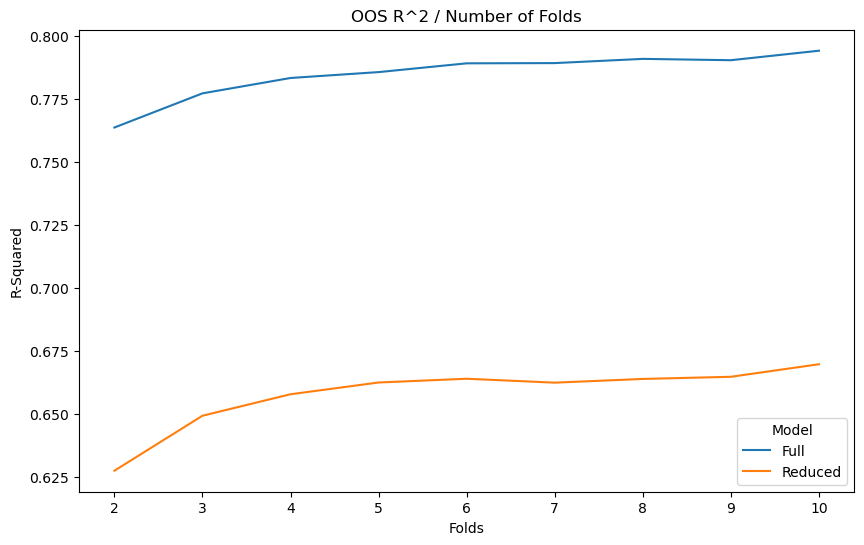

In [157]:
## R^2
labels = ["Full", "Reduced"]
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
sns.lineplot(data=metrics_df_all, x = 'Folds', y= 'R-Squared', hue='Model')

plt.title("OOS R^2 / Number of Folds")
plt.show()

**R^2**
- Full model demonstrates better performance across all folds (lower RMSE).
- K=10 exhibits the best performance.

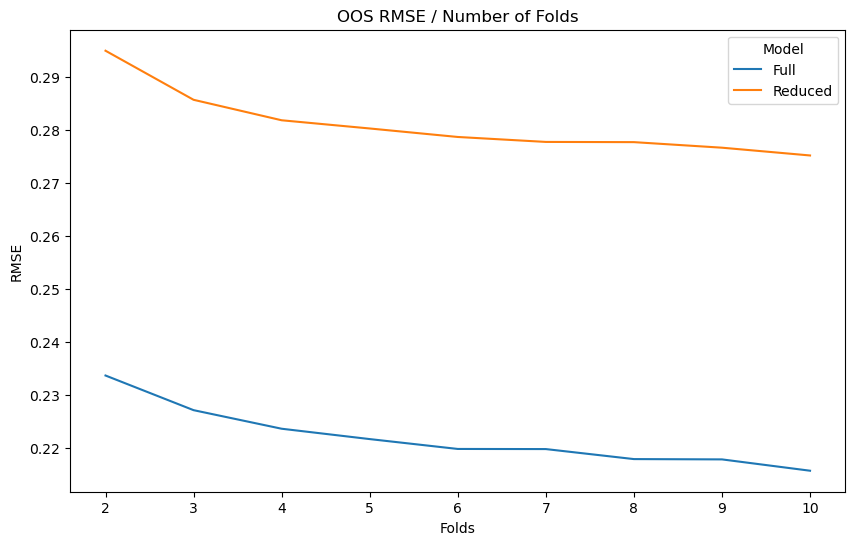

In [158]:
## RMSE
labels = ["Full", "Reduced"]
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
sns.lineplot(data=metrics_df_all, x = 'Folds', y= 'RMSE', hue='Model')

plt.title("OOS RMSE / Number of Folds")
plt.show()

Full model demonstrates higher accuracy, higher R-squared, and lower RMSE across all folds(all out-of-sample). Hence, Full model performs better.